In [ ]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Constantes
P1 = 1800 # Compresion de la Carga - Constante de Franja
P2 = 2000
P3 = 2200
T = 10*10**-3 # Grosor
R = 25*10**-3  # Radio
D = 217.3*10**-12
C = 4.5*10**-12
lamda = 532*10**-9

In [3]:
sigma_xx = np.zeros((513, 513),dtype='float')
sigma_yy = np.zeros((513, 513),dtype='float')
tau_xy = np.zeros((513, 513),dtype='float')

sigma_xx_1 = np.zeros((513, 513),dtype='float')
sigma_yy_1 = np.zeros((513, 513),dtype='float')
tau_xy_1 = np.zeros((513, 513),dtype='float')

sigma_xx_2 = np.zeros((513, 513),dtype='float')
sigma_yy_2 = np.zeros((513, 513),dtype='float')
tau_xy_2 = np.zeros((513, 513),dtype='float')

In [4]:
# Genera valores para el radio

xc = np.linspace(-1*R, R, num=514)
yc = xc
xx, yy = np.meshgrid(xc,yc)

In [5]:
# Crea sigma_xx, sigma_yy, tau_xy
# Crea sigma_xx_1, sigma_yy_1, tau_xy_1
# Crea sigma_xx_2, sigma_yy_2, tau_xy_2

Factor1 = (2*P2)/(np.pi*T)
Factor2 = (2*P1)/(np.pi*T)
Factor3 = (2*P3)/(np.pi*T)

for j in range(513):
    for k in range(513):
        
        x = xx.item((j,k))
        y = yy.item((j,k))
        
        den1 = ((x**2) + ((R - y)**2))**2
        den2 = ((x**2) + ((R + y)**2))**2
        
        r = (x**2+y**2)**0.5
        
        if r <= R :
            
            sigma_xx[j,k] = -1*Factor1*((((R - y)*(x**2))/(den1)) + (((R + y)*(x**2))/(den2)) - (1/(2*R)))
            sigma_yy[j,k] = -1*Factor1*((((R - y)**3)/(den1)) + (((R + y)**3)/(den2)) - (1/(2*R)))
            tau_xy[j,k] = Factor1*(((((R - y)**2)*x)/(den1)) - ((((R + y)**2)*x)/(den2)))
            
            sigma_xx_1[j,k] = -1*Factor2*((((R - y)*(x**2))/(den1)) + (((R + y)*(x**2))/(den2)) - (1/(2*R)))
            sigma_yy_1[j,k] = -1*Factor2*((((R - y)**3)/(den1)) + (((R + y)**3)/(den2)) - (1/(2*R)))
            tau_xy_1[j,k] = Factor2*(((((R - y)**2)*x)/(den1)) - ((((R + y)**2)*x)/(den2)))
            
            sigma_xx_2[j,k] = -1*Factor3*((((R - y)*(x**2))/(den1)) + (((R + y)*(x**2))/(den2)) - (1/(2*R)))
            sigma_yy_2[j,k] = -1*Factor3*((((R - y)**3)/(den1)) + (((R + y)**3)/(den2)) - (1/(2*R)))
            tau_xy_2[j,k] = Factor3*(((((R - y)**2)*x)/(den1)) - ((((R + y)**2)*x)/(den2)))
        
        else:
            
            tau_xy[j,k] = 0
            sigma_xx[j,k] = 0
            sigma_xx[j,k] = 0
            
            tau_xy_1[j,k] = 0
            sigma_xx_1[j,k] = 0
            sigma_xx_1[j,k] = 0
            
            tau_xy_2[j,k] = 0
            sigma_xx_2[j,k] = 0
            sigma_xx_2[j,k] = 0

In [6]:
# isoclinico

isoclin = (0.5*np.arctan2((2*tau_xy),(sigma_xx-sigma_yy)))*(-1)
#plt.imshow(isoclin)

# Sigma 1,2
sigma_1 = ((sigma_xx + sigma_yy)/2) + np.sqrt((((sigma_xx - sigma_yy)/2)**2) + (tau_xy)**2)     
sigma_2 = ((sigma_xx + sigma_yy)/2) - np.sqrt((((sigma_xx - sigma_yy)/2)**2) + (tau_xy)**2)

# isoclinico_1

isoclin_1 = (0.5*np.arctan2((2*tau_xy_1),(sigma_xx_1 - sigma_yy_1)))*(-1)
#plt.imshow(isoclin)

# Sigma 1,2
sigma_1_1 = ((sigma_xx_1 + sigma_yy_1)/2) + np.sqrt((((sigma_xx_1 - sigma_yy_1)/2)**2) + (tau_xy_1)**2)     
sigma_2_1 = ((sigma_xx_1 + sigma_yy_1)/2) - np.sqrt((((sigma_xx_1 - sigma_yy_1)/2)**2) + (tau_xy_1)**2)

# isoclinico_2

isoclin_2 = (0.5*np.arctan2((2*tau_xy_2),(sigma_xx_2 - sigma_yy_2)))*(-1)
#plt.imshow(isoclin)

# Sigma 1,2
sigma_1_2 = ((sigma_xx_2 + sigma_yy_2)/2) + np.sqrt((((sigma_xx_2 - sigma_yy_2)/2)**2) + (tau_xy_2)**2)     
sigma_2_2 = ((sigma_xx_2 + sigma_yy_2)/2) - np.sqrt((((sigma_xx_2 - sigma_yy_2)/2)**2) + (tau_xy_2)**2)

In [7]:
delta = 2*np.pi*T*C*(sigma_1 - sigma_2) / (lamda) # P
I1 = (1+np.cos(delta))/2
diff_sigma = sigma_1 - sigma_2

In [ ]:
'''
I2 = (1-np.cos(delta))/2
delta_2 = 2*np.pi*T*C*(sigma_1_2 - sigma_2_2) / (lamda) # P + delta P
I3 = (1+np.cos(delta_2))/2
I4 = (1-np.cos(delta_2))/2

delta_1 = 2*np.pi*T*C*(sigma_1_1 - sigma_2_1) / (lamda) # P - delta P
I5 = (1+np.cos(delta_1))/2
I6 = (1-np.cos(delta_1))/2
'''

In [8]:
limite_elastico = 70*10**6  #  PMMA=70MPa

umbral_1 = 0.80             # 50 por 100 del límite elástico
umbral_2 = 0.50             # 30 por 100 del límite elástico
umbral_3 = 0.10             # 10 por 100 del límite elástico
umbral_4 = 0.0              # 0 por 100 del límite elástico

image_color_truth = np.zeros((513,513,3))

zona1_delta = []
zona2_delta = []
zona3_delta = []
zona4_delta = []

zona1_I1 = []
zona2_I1 = []
zona3_I1 = []
zona4_I1 = []

In [9]:
for i in range(513):
    for j in range(513):
        
        if diff_sigma[i,j] > umbral_1 * limite_elastico:
            image_color_truth[i,j,0] = 255
            image_color_truth[i,j,1] = 0
            image_color_truth[i,j,2] = 0
            zona1_delta = np.append(zona1_delta, [delta[i,j]])
            zona1_I1 = np.append(zona1_I1, [I1[i,j]])
            
        elif (diff_sigma[i,j] > umbral_2 * limite_elastico and diff_sigma[i,j] <= umbral_1 *limite_elastico):
            image_color_truth[i,j,0] = 255
            image_color_truth[i,j,1] = 255
            image_color_truth[i,j,2] = 0
            zona2_delta = np.append(zona2_delta, [delta[i,j]])
            zona2_I1 = np.append(zona2_I1, [I1[i,j]])
            
        elif (diff_sigma[i,j] > umbral_3 * limite_elastico and diff_sigma[i,j] <= umbral_2 * limite_elastico):
            image_color_truth[i,j,0] = 0
            image_color_truth[i,j,1] = 255
            image_color_truth[i,j,2] = 0
            zona3_delta = np.append(zona3_delta, [delta[i,j]])
            zona3_I1 = np.append(zona3_I1, [I1[i,j]])
            
        elif (diff_sigma[i,j] > umbral_4 and diff_sigma[i,j] <= umbral_3 * limite_elastico):
            image_color_truth[i,j,0] = 0
            image_color_truth[i,j,1] = 0
            image_color_truth[i,j,2] = 255
            zona4_delta = np.append(zona4_delta, [delta[i,j]])
            zona4_I1 = np.append(zona4_I1, [I1[i,j]])

In [11]:
image_color_truth = np.array(image_color_truth, dtype = 'uint8')

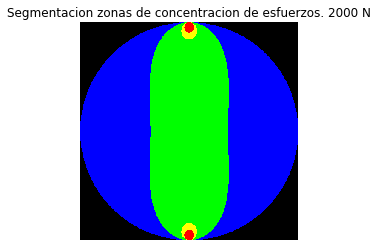

In [13]:
plt.imshow(image_color_truth)
plt.axis('off')
plt.title('Segmentacion zonas de concentracion de esfuerzos. 2000 N')
plt.show()

In [14]:
imagen_mean = image_color_truth[0:256,:,:]
delta_mean = delta[0:256,:]
I1_mean = I1[0:256,:]

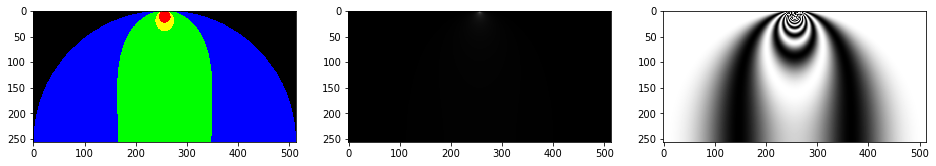

In [15]:
plt.subplots(figsize = (16,8))

plt.subplot(131)
plt.imshow(imagen_mean)

plt.subplot(132)
plt.imshow(delta_mean, cmap = 'gray')

plt.subplot(133)
plt.imshow(I1_mean, cmap = 'gray')
plt.show()

In [14]:
ssim_zona1 = ssim(zona1_delta, zona1_I1)
ssim_zona2 = ssim(zona2_delta, zona2_I1)
ssim_zona3 = ssim(zona3_delta, zona3_I1)
ssim_zona4 = ssim(zona4_delta, zona4_I1)

print(ssim_zona1)
print(ssim_zona2)
print(ssim_zona3)
print(ssim_zona4)

0.0003989303566140689
-0.007938972500773427
0.1352139256828083
0.11868655279321597
